# HW №2 от Бондаренко Алексея (bondaleksey@gmail.com)

Цель данного ноутбука на тестовом наборе данных провести:
- сравнение методов кластеризации k-means, hierarhical и DBSCAN
- осуществить визуализацию разбиения на кластеры, основывась на методы сжатия признакового пространства PCA, tSNE, UMAP 


Основные пункты задания: 

*   Разведовательный анализ (EDA) и предобработка данных
*   Кластеризация и визуалиазция разбиений 
*   Интерпретация результатов

Мотивация: 
Сегментация клиентов (в данном случае - банка). Крайне полезная операция, которая позволяет вам лучше познакомится со своей аудиторией, понять, на какие группы она делится и чем они характеризуются.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 1 Разведовательный анализ и предобработка данных

В работе используются известный датасет [клиентов немецкого банка](https://www.kaggle.com/uciml/german-credit) размещенный на Kaggle. Чтобы не плодить лишние сущности папка data включена в файл gitignore. 




In [17]:
# from os.path import exists
# filepath = 'data_cl/'
# if exists(filepath):
#     print(f"filepath {filepath} existing")
    

filepath data_cl/ existing


## 1.1 Получим первое впечатление о данных 

In [19]:
data = pd.read_csv('data_cl/archive.zip', compression='zip', header=0, sep=',', quotechar='"')

In [20]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [23]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


## 1.2 Проведем разведовательный анализ данных

Printing figures for columns:
 Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')
Age type is int64


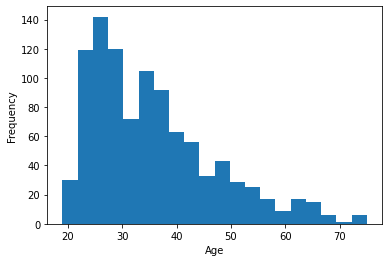

Sex type is object


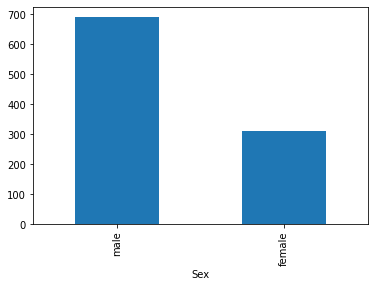

Job type is int64


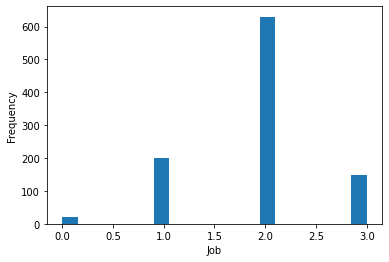

Housing type is object


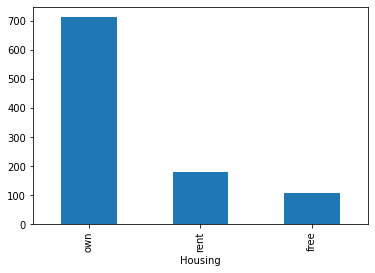

Saving accounts type is object


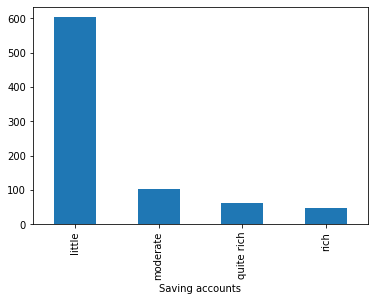

Checking account type is object


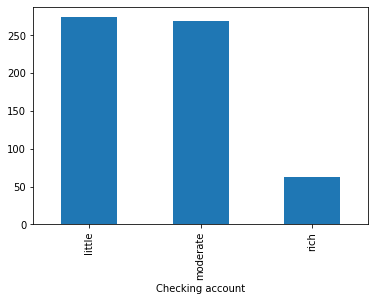

Credit amount type is int64


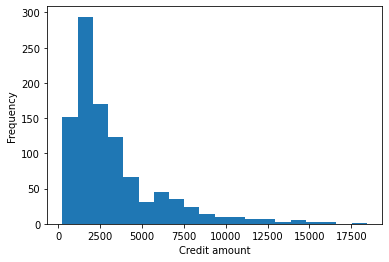

Duration type is int64


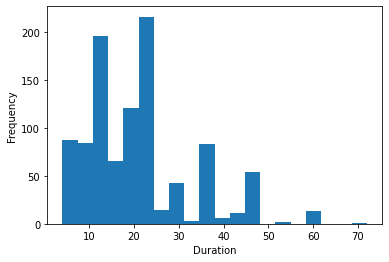

Purpose type is object


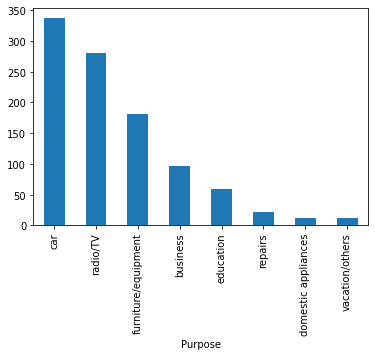

In [60]:
cols = data.columns[1:]
print('Printing figures for columns:\n',cols)
for item in cols:
    dt = data[item].dtype  
    print(f'{item} type is {dt}')  
    if dt == 'int64'or dt == 'int32':        
        ax = data[item].plot(kind = 'hist', bins = 20)
        ax.set_xlabel(item)
        plt.show()
    elif dt == 'object':
        ax = data[item].value_counts().plot(kind = 'bar')
        ax.set_xlabel(item)
        plt.show()
    else:
        print(f'ooops, have problems with {item}')


## 1.3 Преобразуем все признаки в числовые

## 1.4 Приведем все даные к одному масштабу


# 2 Моделирование

## 2.1 Рассмотрим 3 варианта кластеризации: k-means, hierarhical и DBSCAN


## 2.2 Определим оптимальное число кластеров, используя Elbow method и Silhouette plot